In [142]:
from PIL import Image
import pickle as pkl
import os
import numpy as np

In [143]:
with open('/media/yaosy/办公/bdmeet/mowei/face/face512x512_axis.pkl', 'rb') as f:
    face_pos = pkl.load(f)

In [144]:
crop_w = 128 / 2
crop_h = 128 / 2
face_dir = '/media/yaosy/办公/bdmeet/mowei/face/mowei_face/'
mov_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/results/target/test_latest/images/'
synFace_dir = '/home/yaosy/Document/pytorch-EverybodyDanceNow/results/yaosyFace/test_latest/images/'
mergePic_dir = '/media/yaosy/办公/bdmeet/yaosy/merge_result/'
facename_list = sorted(os.listdir(face_dir))
len(facename_list)

3315

In [145]:
for i, facename in enumerate(facename_list):
#     if i > 10:
#         break
    num = facename.split('_')[1][:4]
    bodyName = 'img_{}_rendered_synthesized_image.jpg'.format(num)
    bodyPath = os.path.join(mov_dir, bodyName)
    
    body = Image.open(bodyPath)
    body = body.resize((512, 512))
    body_arr = np.array(body)
    
    mid_w = (face_pos[i][0, 0] + face_pos[i][0, 2]) / 2
    mid_h = (face_pos[i][0, 1] + face_pos[i][0, 3]) / 2
    
    left = int(mid_w - crop_w)
    right = int(mid_w + crop_w)
    lower = int(mid_h - crop_h)
    upper = int(mid_h + crop_h)
    body_test = body.crop((mid_w - crop_w, mid_h - crop_h, mid_w + crop_w, mid_h + crop_h))
    
    bodyFace = body_arr[lower:upper, left:right, :].copy()
    
    faceName = 'label_{}_synthesized_image.jpg'.format(num)
    facePath = os.path.join(synFace_dir, faceName)
    
    face = Image.open(facePath)
    face_arr = np.array(face)
    
    body_arr[lower:upper, left:right, :] = face_arr
    mergePic = Image.fromarray(body_arr)
    mergeSaveName = 'merge_{}.png'.format(num)
    mergePic.save(os.path.join(mergePic_dir, mergeSaveName))
# for pos in face_pos:
#     mid_w = (pos[0, 2] + pos[0, 0]) / 2
#     mid_h = (pos[0, 1] + pos[0, 3]) / 2
    

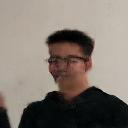

In [146]:
face

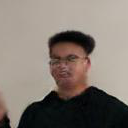

In [147]:
body_test

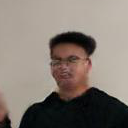

In [148]:
Image.fromarray(bodyFace)

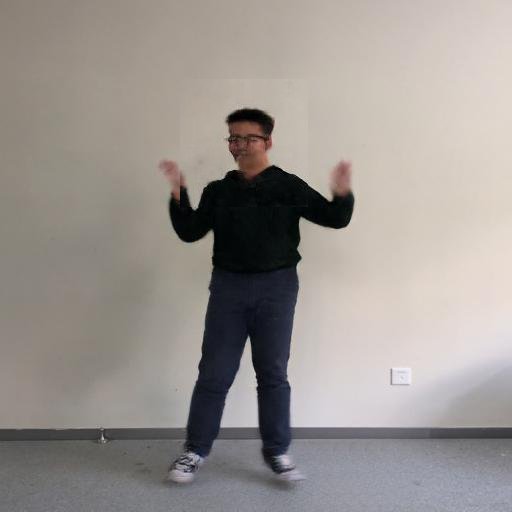

In [149]:
mergePic

In [ ]:
mov_dir = '/media/yaosy/办公/bdmeet/mowei/mowei_squareMov/'
save_dir = '/media/yaosy/办公/bdmeet/mowei/face/mowei_face/'
bbox_axis = []
noFace_order = []
filename_list = sorted(os.listdir(mov_dir))
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [ ]:
for i, filename in enumerate(filename_list):
    # print(filename)
#     if i <= 1089:
#         continue
    img_path = os.path.join(mov_dir, filename)
    img = Image.open(img_path)
    img = img.resize((512, 512))
    bounding_boxes, landmarks = detect_faces(img)
    if len(bounding_boxes) != 0:
        bbox_axis.append(bounding_boxes)
        face = img.crop((bounding_boxes[0, 0], bounding_boxes[0, 1], bounding_boxes[0, 2], bounding_boxes[0, 3]))
        face.save(os.path.join(save_dir, 'face_{:04d}.png'.format(i)))
    else: 
        noFace_order.append(i)
        print('{} dose not have a face'.format(filename))

In [ ]:
Image.open()